In [ ]:
# Oracle Accelerated Data Science (ADS) Evaluators

In [16]:
from sklearn. datasets import make_classification 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from ads.common.model import ADSModel 
from ads.model import GenericModel
from ads.common.data import ADSData 
from ads.evaluations.evaluator import ADSEvaluator

import warnings
warnings.filterwarnings('ignore')

In [2]:
seed = 42

X, y = make_classification(n_samples=10000, n_features=25, n_classes=2, flip_y=0.2)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=seed)

In [3]:
lr_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(train_x, train_y)
rf_clf = RandomForestClassifier(n_estimators=50).fit(train_x, train_y)

In [11]:
bin_lr_model = ADSModel.from_estimator(lr_clf, classes=[0, 1])
bin_rf_model = ADSModel.from_estimator(rf_clf, classes=[0, 1])

# bin_lr_model_2 = GenericModel

In [7]:
evaluator = ADSEvaluator(
    ADSData(test_x, test_y),
    models = [bin_lr_model, bin_rf_model],
    training_data=ADSData(train_x, train_y),

)

In [13]:
print(evaluator.metrics)

,LogisticRegression,RandomForestClassifier
Accuracy,0.8103,0.8363
Hamming distance,0.1897,0.1637
Precision,0.8062,0.8135
Recall,0.8079,0.8649
F1,0.8071,0.8384
ROC AUC,0.8615,0.8742


,LogisticRegression,RandomForestClassifier
Accuracy,0.8151,0.9996
Hamming distance,0.1849,0.0004
Precision,0.8355,0.9994
Recall,0.7908,0.9997
F1,0.8125,0.9996
ROC AUC,0.8666,1.0000


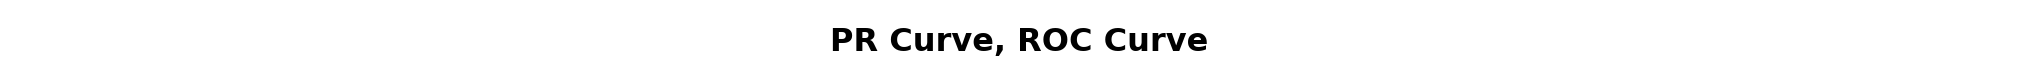

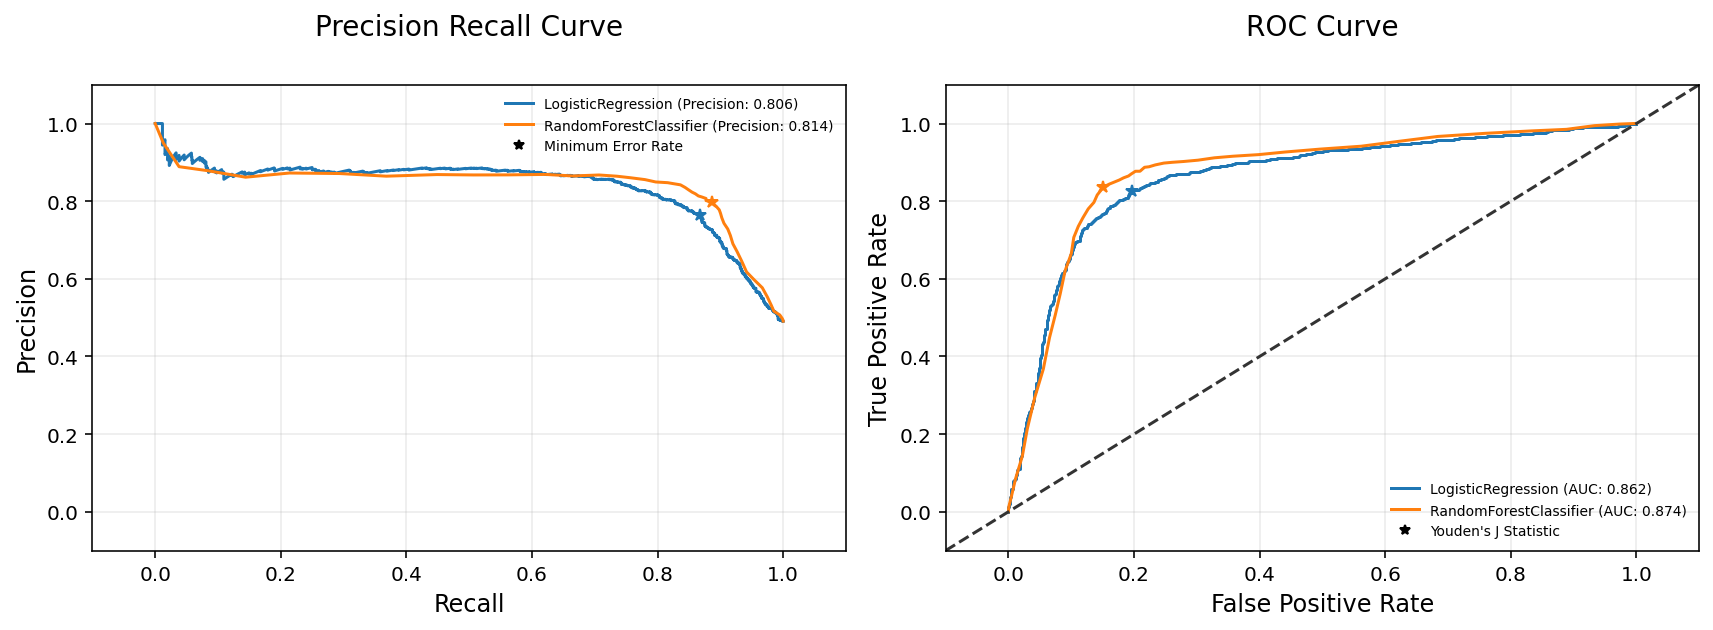

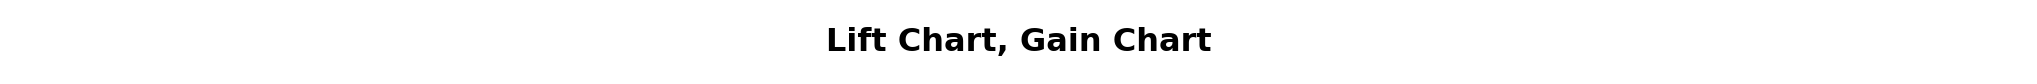

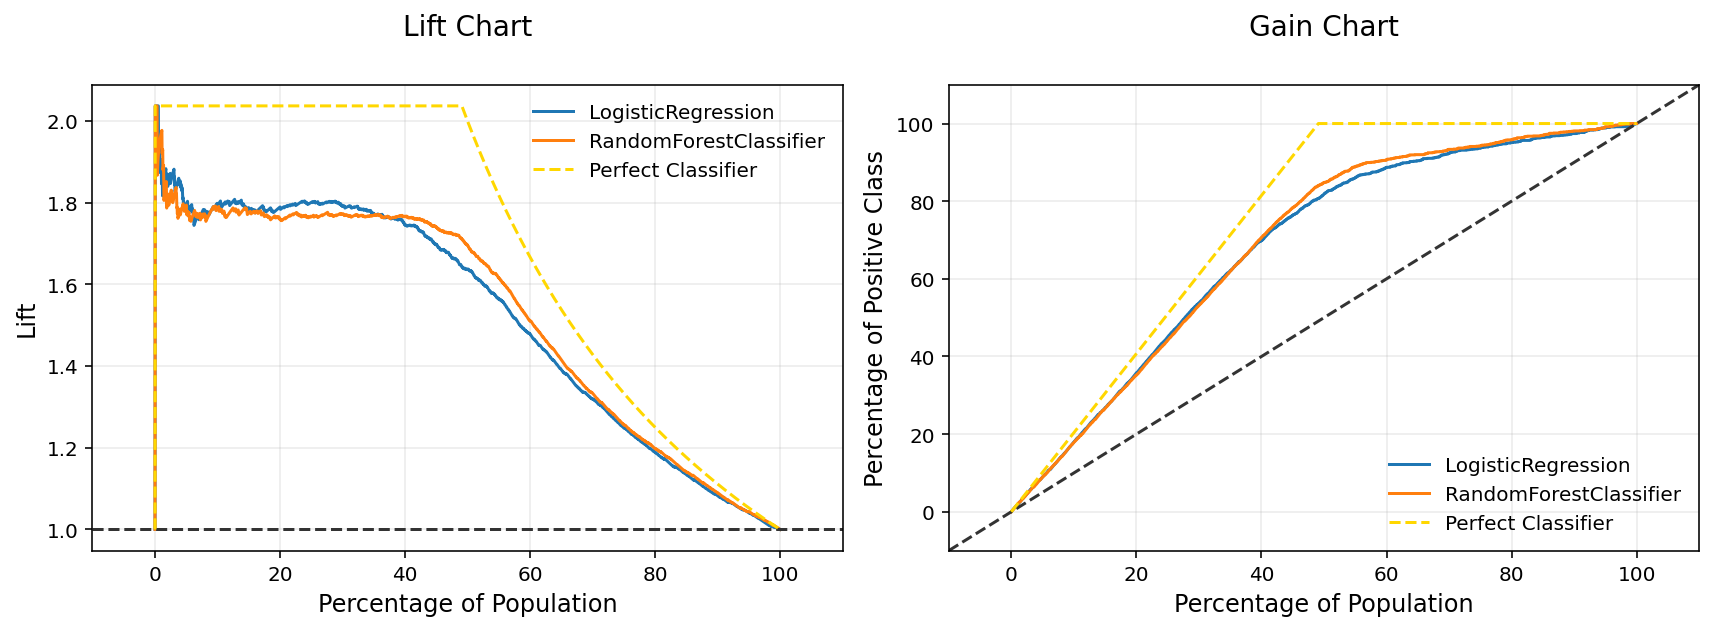

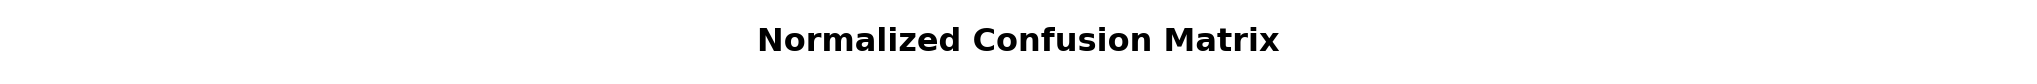

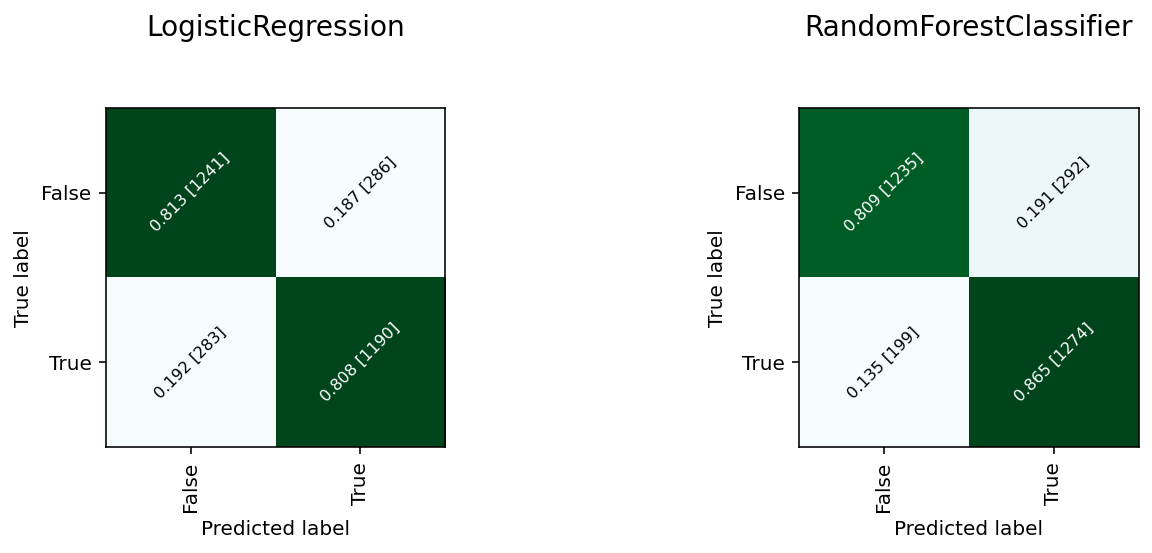

In [17]:
evaluator.show_in_notebook(perfect=True)